<a href="https://colab.research.google.com/github/DaH7/Machine-Learning-Concepts/blob/main/Pytorch__Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pytorch Workflow

Exploring Pytorch end to end workflow

In [ ]:
import torch
from torch import nn # contrains all building block for neural networks
import matplotlib.pyplot as plt
import numpy as np


#check Pytorch version
torch.__version__

'2.3.0+cu121'

1. Data (preparing and loading)

ML is a game with 2 parts
1. get data into numerical represnetation
2. Build a model to learn patterns in that numerical representation

Linear regression formula with known parameters


In [ ]:
#create known parameters
weight = 0.7
bias = 0.3

#create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step). unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

Splitting data into training and test sets (one of the most important concepts in ML)

In [ ]:
#create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

"Visualize, Visualize , Visualize!"

In [ ]:
def plot_prediction(train_data = X_train,
                    train_labels= y_train,
                    test_data = X_test,
                    test_labels= y_test,
                    predictions=None):

  #plots training data, test data, and compares predictions.

  plt.figure(figsize=(10,7))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c = "b", s = 4, label = "Training data")

  #plot test data in green
  plt.scatter(test_data, test_labels, c="g",s=4,label="Testing data")

  # are there predictions?
  if predictions is not None:
    #plot predictions if they exist
    plt.scatter(test_data, predictions,c="r",s=4,label="Predictions")

  #Show legend
  plt.legend();



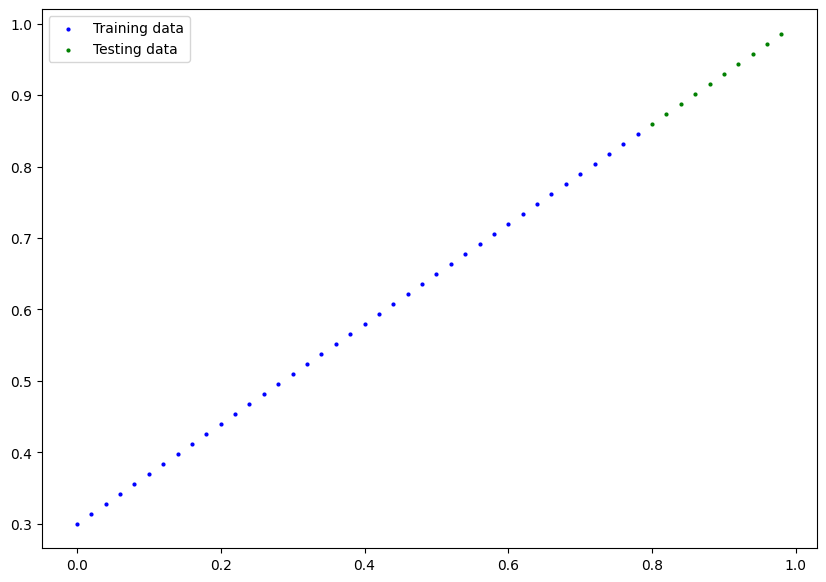

In [ ]:
plot_prediction();

2. Build model

1.Start with random values (weight and bias)

2.Look at training data and adjust the random values to better represent (or get close to) ideal values ( weight and bias values we used to create data)


Does it through 2 main algorithms:

1.Gradient decent

2.Backpropagation

In [ ]:
#create linear regression model class
from torch import nn

class LinearRegressionModel(nn.Module): #almost everything in pytorch inherhits from nn.Module
  def __init__(self):
    super().__init__()
    #Initialize model parameters
    self.weight = nn.Parameter(torch.randn(1, #start with random weight and try to adjust it to ideal weight
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, #start with random bias and try to adjust to ideal bias
                                         requires_grad=True,
                                         dtype=torch.float))

  #forward method to define computation in model
  def forward(self, x:torch.Tensor) -> torch.Tensor: #"x" is the input data
    return self.weight * x + self.bias # this is the linear regression formula

PyTorch model building essentials

1. torch.nn - conatians all building for computational graphs ( a nueral network is consider as a computational graph
2. torch.nn.Parameter - what parameters should our model try and learn, often a pytorch layer from torch.nn wukk set these for us
3. torch.nn.Module - base class for all neural network modules, if you subclass it, you should overwrite forward()
4. torch.optim - this where optimizers in pythorch live, they will help with gradient descent
5. def forward() - all nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

Checking contents of model

Let's see whats inside of model created

so we can check our model parameters or what's inside our model using .paramaters()

In [ ]:
#create random seed, make  it repeatable
torch.manual_seed(42)

#create instance of model (subclass of nn.module)
model_0 = LinearRegressionModel()

#check out the paramters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List namned parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making Prediction using `torch.inference_mode()`

To check model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it is going to run it through the `foward()` method.

In [ ]:
#make prediction with model

with torch.inference_mode(): #can also use torch.no_grad(), but torch.inference_mode() is preferred
  y_preds=model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

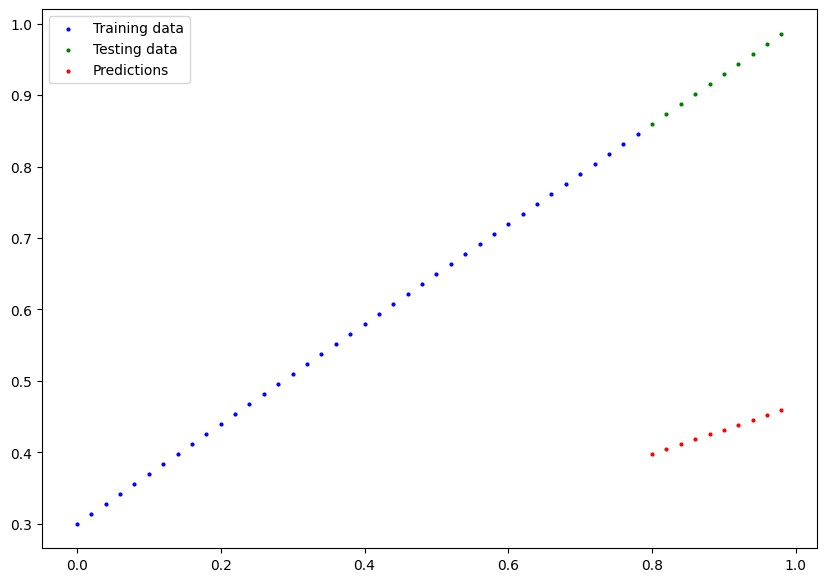

In [ ]:
plot_prediction(predictions=y_preds)

### 3. Train model

Whole point of training model is to move from "unknown" parameters to (may be random) to "known" parameters

or from poor representation of data to a better representation of that data


One way to measure how poor or how wrong models prediction are is to use a loss function

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss function:** function to measure how wrong your model's predictino are from the expected output, Lower number for this is better.

* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight and bias) to improve loss function

inside optimizers, you'll need to set up 2 paramenters:
* `params` - model parameters you'd like to optimize, ex: `params=model_0.parameters()`
*`lr` (learning rate) - learning rate is hyperparameter that defines how big or small the opimizer chanes the parameters with each step (a small `lr` results in small change, a large `lr` results in large changes



and specifically for pytorch, we need:
* A training loop
* a test loop


In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# setup a loss function
loss_fn = nn.L1Loss()

# setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr = 0.01) # lr = learning rate = most important hyperparameter you can set.


###Building training loop (and testing loop) in pytorch

A couple of things we need in a training loop:
0. loop through the data and do...
1. forward pass (involves data moving through  our model's `forward()` functions) to make predictions on data - also called forward propagation
2. calculate the loss  (compare forward pass predictions to ground truth labels)
3. opitmizer zero grad
4. loss backward - move backwards through the network to calculate the graidents of each of the parameters of our model with respect to loss
5. opitmizer step - use the optimizer to adjust our model's parameters to try and improve our loss (gradient descent)

In [ ]:
#an epoch is one loop through the data.. (this is hyperparameters because we set it ourself)
torch.manual_seed(42)

epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

### Training
#0. loop through the data

for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # train mode in pytorch set all parameters that require gradients to require gradients

  #1. forward pass
  y_pred = model_0(X_train)

  #2. Calculate the loss
  loss = loss_fn(y_pred,y_train)
  print(f"Loss:{loss}")

  #3. opimizer zero grad
  optimizer.zero_grad()


  #4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  #5. step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will acclumate through the loop so.. we have to zero them above in step 3 for the next iteration of the loop


  #Testing
  model_0.eval() #turns off gradient tracking
  with torch.inference_mode(): # turns off gradient tracking nad a couple more things behind the scene

  # with torch.no_grad(): # you may also see torch.no_grad() in older PyTorch code

    #1. Do the forward pass
    test_pred = model_0(X_test)

    #2 calculate test loss
    test_loss = loss_fn(test_pred,y_test)

  # print out what's happening
  if epoch % 10 == 0:

    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch: {epoch} | Test: {loss} | Test loss : {test_loss}")

    # print model state_dicct()
    print(model_0.state_dict())


Loss:0.31288138031959534
Epoch: 0 | Test: 0.31288138031959534 | Test loss : 0.48106518387794495
OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss:0.3013603389263153
Loss:0.28983935713768005
Loss:0.2783183455467224
Loss:0.26679736375808716
Loss:0.2552763521671295
Loss:0.24375534057617188
Loss:0.23223432898521423
Loss:0.22071333229541779
Loss:0.20919232070446014
Loss:0.1976713240146637
Epoch: 10 | Test: 0.1976713240146637 | Test loss : 0.3463551998138428
OrderedDict([('weight', tensor([0.3796])), ('bias', tensor([0.2388]))])
Loss:0.18615034222602844
Loss:0.1746293306350708
Loss:0.16310831904411316
Loss:0.1515873372554779
Loss:0.14006635546684265
Loss:0.1285453587770462
Loss:0.11702437698841095
Loss:0.1060912236571312
Loss:0.09681284427642822
Loss:0.08908725529909134
Epoch: 20 | Test: 0.08908725529909134 | Test loss : 0.21729660034179688
OrderedDict([('weight', tensor([0.4184])), ('bias', tensor([0.3333]))])
Loss:0.08227583020925522
Loss:0.07638873159885406
Loss

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

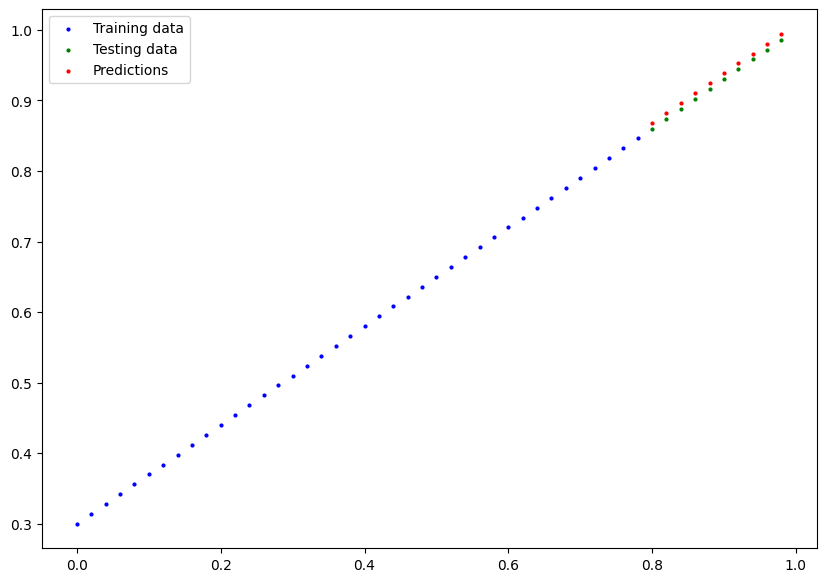

In [ ]:
plot_prediction(predictions=y_preds_new);

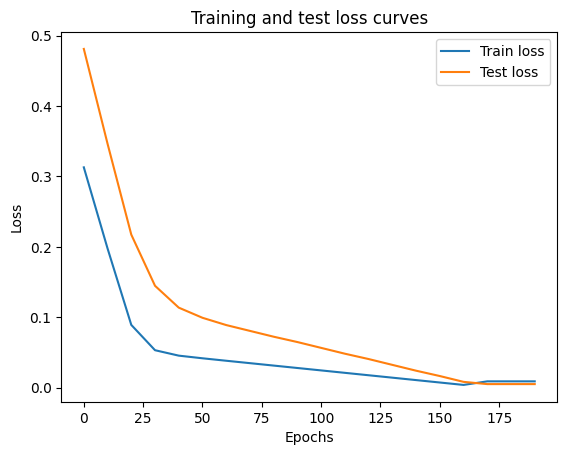

In [ ]:
#plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Train loss") #set loss_values from tensor to a float32
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt. title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

## Saving model in Pytorch

There are 3 mains ways to save and load models

1. `torch.save()` - allows you save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved Pytorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionay

In [ ]:
#saving our Pytorch model

from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME = "01_Pytorch _Workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

#save the model state_dict
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH )

## Loading a model in Pytorch

Since we saved our models `state.dict()` rather than the entire mode, we'll create a new instance of our model class and load the saved `state.dict()` into that.

In [ ]:
model_0.state_dict()


OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# to load in a saved state_dict we have to instatiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

#load the saved state_dict of model_0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
#make some predction with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
#compare loaded model preds with original model
loaded_model_preds == y_preds_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6.Putting it all together

Let's go back through the steps above and see it all in the one place.

In [ ]:
#import Pytorh and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

#check PYtorch version
torch.__version__


'2.3.0+cu121'

Creat device-agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computing).

If no GPU is available, the code will default to using CPU.


In [ ]:
#setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")


Using device: cpu


##  Create some data using linear regression formula of y = weight * X + bias

In [ ]:
#create some data for the formula
weight = 0.65
bias =  0.35

#create range values
start = 0
end = 1
step = 0.02

# create X and y (features and labels)
X = torch.arange(start,end,step).unsqueeze(dim=1) # without unsqueeze, error will pop

y = weight * X + bias
X[:10] , y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3500],
         [0.3630],
         [0.3760],
         [0.3890],
         [0.4020],
         [0.4150],
         [0.4280],
         [0.4410],
         [0.4540],
         [0.4670]]))

In [ ]:
#split data
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test,y_test = X[train_split:], y[train_split:]
len(X_train),len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

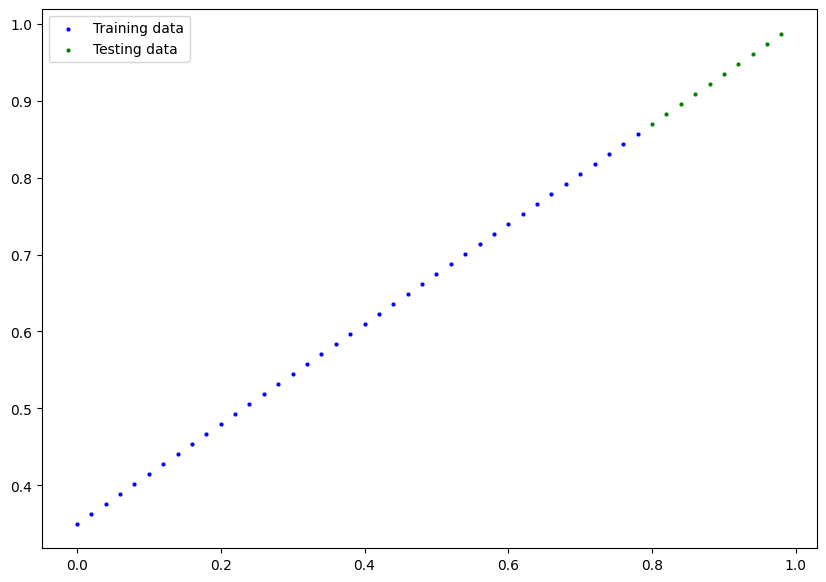

In [ ]:
#plot the data
plot_prediction(X_train,y_train,X_test,y_test)

##6.2 Building Pytorch Linear Model


In [ ]:
#Create linear model by sublcassing nn.Modlue
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #use nn.linear() for creating model paramters / also called: linear transform, probing layer, fully connected layer
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)


#set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3500],
         [0.3630],
         [0.3760],
         [0.3890],
         [0.4020]]))

In [ ]:
# set the model to use target device
model_1.to(device)
next(model_1.parameters()).device


device(type='cpu')

##6.3 Training

For training we need:
* loss function
* optimizer
* training loop
* testing loop

In [ ]:
#setup loss function
loss_fn = nn.L1Loss() #same as MAE

#setup optimizer
optimizer = torch.optim.SGD(params= model_1.parameters(),
                            lr=0.01)

In [ ]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

#put data in right device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):

  model_1.train()

  #1. Forward pass
  y_pred = model_1(X_train)

  #2. Calculate loss
  loss = loss_fn(y_pred, y_train)

  #3. optimizer zero grad
  optimizer.zero_grad()

  #4.Perform backpropagation
  loss.backward()

  #5. optimizer step
  optimizer.step()

  #testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred,y_test)

  #print whats happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss:{loss} | test loss: {test_loss}")



Epoch: 0 | Loss:0.5246779322624207 | test loss: 0.5684762001037598
Epoch: 10 | Loss:0.4094680845737457 | test loss: 0.4337664246559143
Epoch: 20 | Loss:0.2942582070827484 | test loss: 0.2990565896034241
Epoch: 30 | Loss:0.1790483295917511 | test loss: 0.16434675455093384
Epoch: 40 | Loss:0.06383846700191498 | test loss: 0.029636919498443604
Epoch: 50 | Loss:0.010777203366160393 | test loss: 0.024112392216920853
Epoch: 60 | Loss:0.007348141632974148 | test loss: 0.01652672328054905
Epoch: 70 | Loss:0.003912393935024738 | test loss: 0.008254188112914562
Epoch: 80 | Loss:0.008415423333644867 | test loss: 0.005816042423248291
Epoch: 90 | Loss:0.008415423333644867 | test loss: 0.005816042423248291
Epoch: 100 | Loss:0.008415423333644867 | test loss: 0.005816042423248291
Epoch: 110 | Loss:0.008415423333644867 | test loss: 0.005816042423248291
Epoch: 120 | Loss:0.008415423333644867 | test loss: 0.005816042423248291
Epoch: 130 | Loss:0.008415423333644867 | test loss: 0.005816042423248291
Epoch:

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6485]])),
             ('linear_layer.bias', tensor([0.3590]))])

###6.4 making and evaulating prediction


In [ ]:
#Turn model into evaluation mode
model_1.eval()

#make prediction on the test data
with torch.inference_mode():
  y_pred_1 = model_1(X_test)

y_pred_1

tensor([[0.8778],
        [0.8908],
        [0.9037],
        [0.9167],
        [0.9297],
        [0.9426],
        [0.9556],
        [0.9686],
        [0.9815],
        [0.9945]])

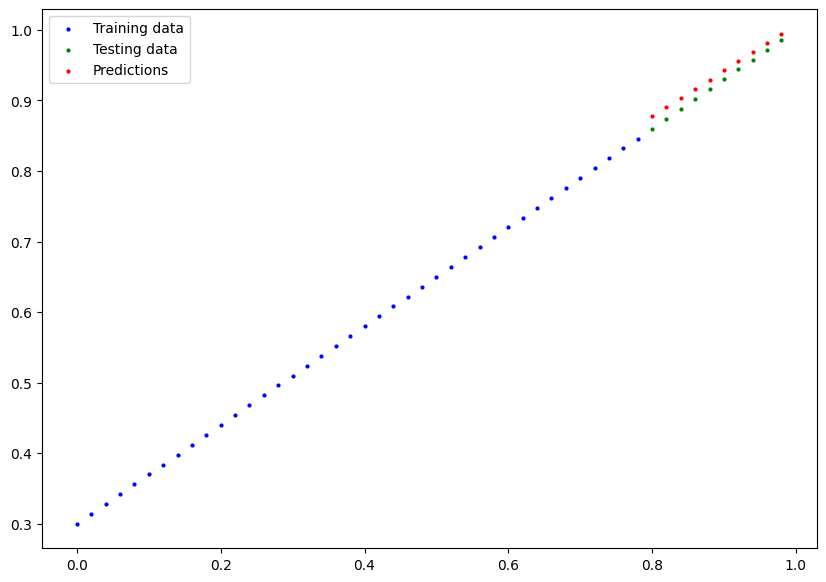

In [ ]:
plot_prediction(predictions=y_pred_1);

### 6.5 Saving & loading a training model


In [ ]:
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,
                 exist_ok=True)

#2 create model save path
Model_name = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. save model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_Pytorch _Workflow_model.pth


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6485]])),
             ('linear_layer.bias', tensor([0.3590]))])

In [ ]:
#Load a Pytorch
loaded_model_1 = LinearRegressionModelV2()

#load the saved model_1 state dict

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

#put loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6485]])),
             ('linear_layer.bias', tensor([0.3590]))])

In [ ]:
#evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_pred_1 ==loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])